<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%203/Airline_Passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding 1	

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).

- The Dataset we picked contains data from  USA airline passenger satisfaction surveys. The data was collected in an effort for airlines to better understand their passengers. 

How will you measure the effectiveness of a good algorithm? 
- Using various questions about their travel, a Clustering Analysis that clusters passengers into satisfied and not satisfied can be built. We will measure the effectiveness of the model by evaluating Silhouette and a comparison of % Satisfied data. 

  Many of the variable columns in this dataset are a part of the % Satsified column, so prediction isn't an aspect of this clustering. The intent is to garner insight into the causes for different levels of satisfaction amongst customers, but it cannot be leveraged as a predictive model, as the input for the model includes aspects of the response variable (an aggregate of the various customer satsifaction columns, creates the criteria for satisfied/disatisfied).

Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?
- Analyzing the variables that determine clusters will provide insight into which factors are most important for airline passenger's satisfaction. This can be leveraged by airline operations, to focus efforts on the areas that are most important for customer satisfaction.



# Data Understanding 1	

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import statistics
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors, KDTree, BallTree
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [33]:
# read the files into a dataframe
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

train.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

# verify the dataframe loaded
print(train.shape)
#print(train.head())

#print('\n')
print(test.shape)
#print(test.head())


(103904, 23)
(25976, 23)


Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: 




| Field                             | Description                                                  | Dtype    |
| --------------------------------- | ------------------------------------------------------------ | -------- |
| Gender                            | Gender of the passengers (Female, Male)                      | object   |
| Customer Type                     | The customer type (Loyal customer, disloyal customer)        | object   |
| Age                               | The actual age of the passengers                             | int64    |
| Type of Travel                    | Purpose of the flight of the passengers (Personal Travel, Business Travel) | object   |
| Class                             | Travel class in the plane of the passengers (Business, Eco, Eco Plus) | object   |
| Flight distance                   | The flight distance of this journey                          | int64    |
| Inflight wifi service             | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) | int64    |
| Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient     | int64    |
| Ease of Online booking            | Satisfaction level of online booking                        | int64    |
| Gate location                     | Satisfaction level of Gate location                          | int64    |
| Food and drink                    | Satisfaction level of Food and drink                         | int64    |
| Online boarding                   | Satisfaction level of online boarding                        | int64    |
| Seat comfort                      | Satisfaction level of Seat comfort                           | int64    |
| Inflight entertainment            | Satisfaction level of inflight entertainment                 | int64    |
| On-board service                  | Satisfaction level of On-board service                       | int64    |
| Leg room service                  | Satisfaction level of Leg room service                       | int64    |
| Baggage handling                  | Satisfaction level of baggage handling                       | int64    |
| Check-in service                  | Satisfaction level of Check-in service                       | int64    |
| Inflight service                  | Satisfaction level of inflight service                       | int64    |
| Cleanliness                       | Satisfaction level of Cleanliness                            | int64    |
| Departure Delay in Minutes        | Minutes delayed when departure                               | int64    |
| Arrival Delay in Minutes          | Minutes delayed when Arrival                                 | float64  |
| Satisfaction                      | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) | object   |


All of the satisfaction level fields are ranked between 0-5. The Satisfaction column is a calculated field, based on the overages of the other satisfaction fields:
- Inflight wifi service
- Departure/Arrival time convenient
- Ease of Online booking
- Gate location
- Food and drink
- Online boarding
- Seat comfort
- Inflight entertainment
- Onboard service
- Leg room service
- Baggage handling
- Check-in service
- Inflight service
- Cleanliness


In [34]:
frames = [train,test]

result = pd.concat(frames)

In [35]:
print(result.info())

result.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [36]:
result.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [37]:
print('Mean: ', result['Arrival Delay in Minutes'].mean())
print('Median: ', result['Arrival Delay in Minutes'].median())
print('Mode: ', statistics.mode(result['Arrival Delay in Minutes']))

Mean:  15.09112883918849
Median:  0.0
Mode:  0.0


### Verify data quality: 

Are there missing values? 
` There are 310 missing values in the Arrival Delay in Minutes column.
- We eliminated an unnecessary column which showed the row number from the dataframe.

In [38]:
result_dupes = len(result)-len(result.drop_duplicates())
result_dupes

0


Duplicate data? 
- There was no duplicate data.

<Axes: xlabel='Flight Distance', ylabel='Count'>

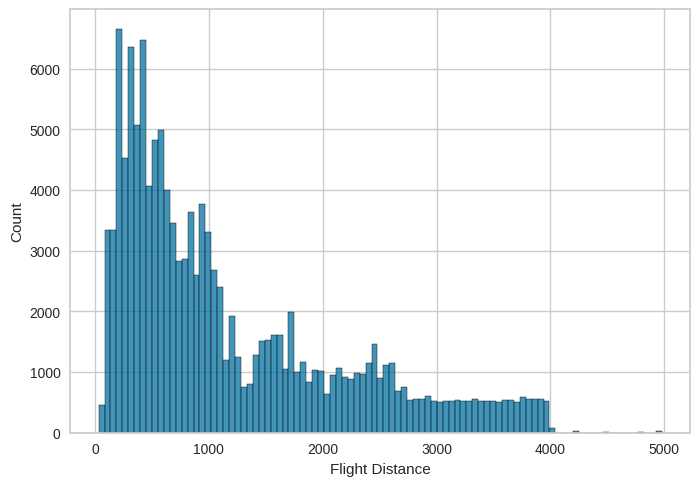

In [39]:
sns.histplot(result['Flight Distance'])



Outliers? 
- Flight Distance had some outliers, and is right skewed, but does not appear to be an error given the dataset-- and variety of distances people can travel by flight.

Are those mistakes? 
- The missing values for Arrival Delay in Minutes, appears to be flights that arrived on time. 

How do you deal with these problems?
- We can either impute the mean or make them 0 or delete these observations. Seeing as how the Mode and the Median are both 0, we will impute them as 0.

In [40]:
# make missing values 0
result['Departure Delay in Minutes'] = result['Departure Delay in Minutes'].fillna(0)
result['Arrival Delay in Minutes'] = result['Arrival Delay in Minutes'].fillna(0)

#had a single row showing up as null across all variables from the import
result=result.dropna()

# check missing values again
result.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Data Understanding 2	

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.


In [41]:
# Utilized https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146

# SMU Colors
my_colors = ['#0033A0', '#C8102E']
sns.set_palette(sns.color_palette(my_colors))

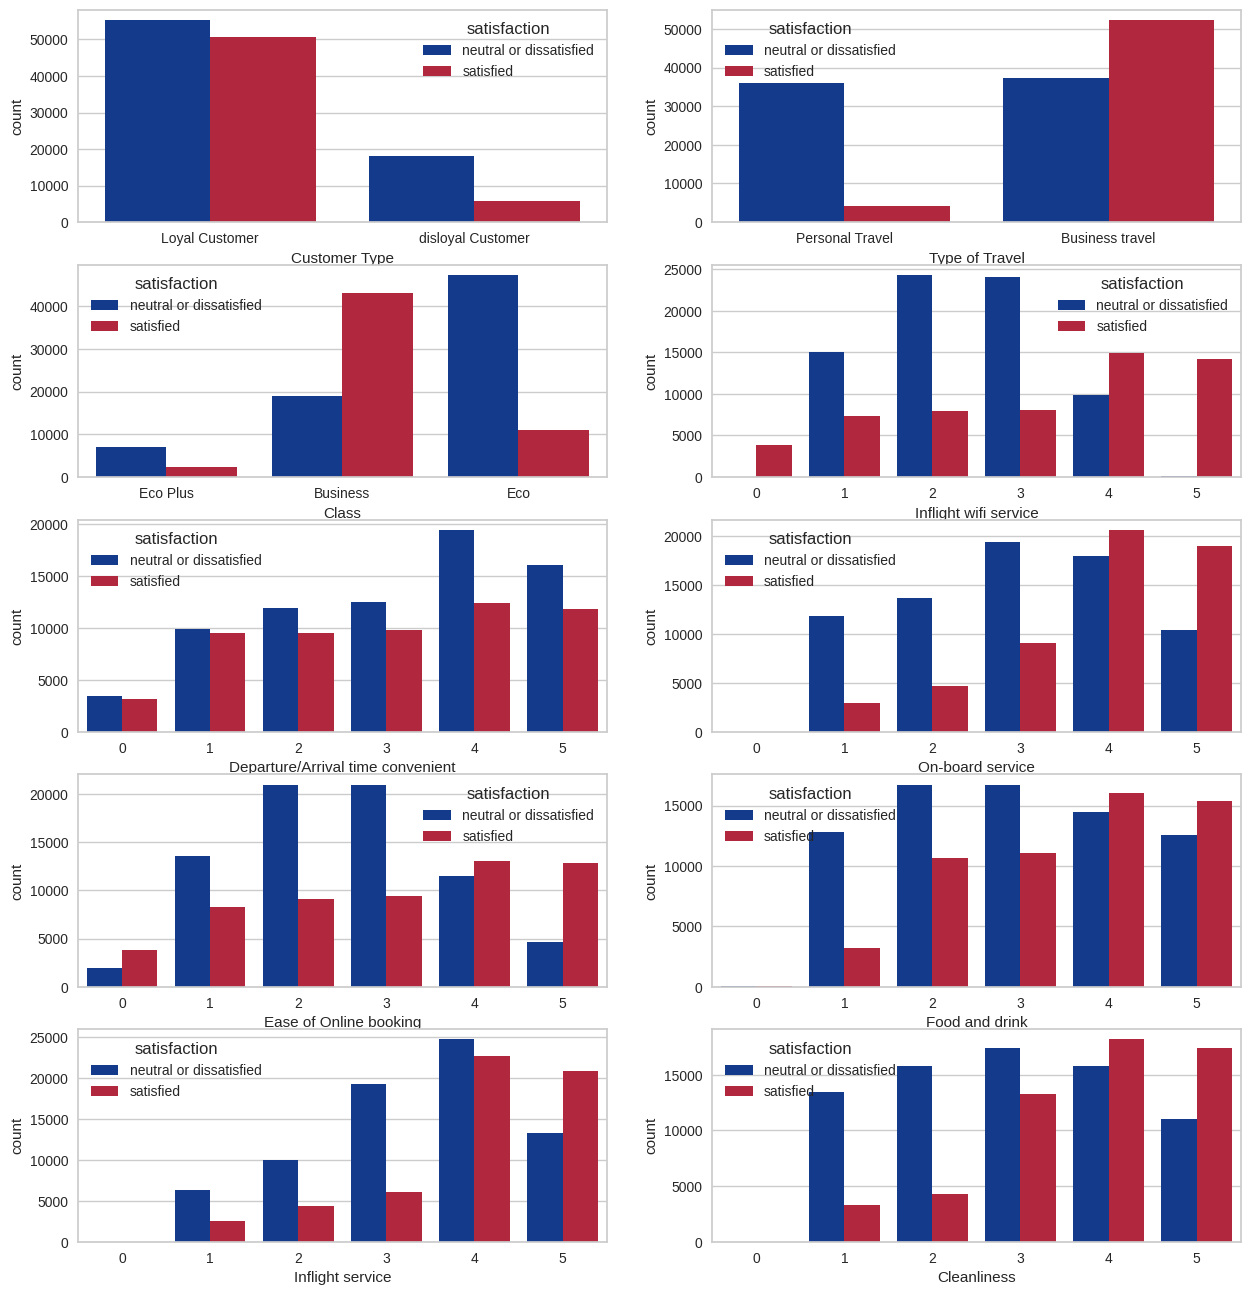

In [42]:
fig, axes = plt.subplots(5, 2, figsize = (15, 16))

sns.countplot(x = 'Customer Type', data = result, hue = 'satisfaction', ax = axes[0, 0]);
sns.countplot(x = 'Type of Travel', data = result, hue = 'satisfaction', ax = axes[0, 1]);
sns.countplot(x = 'Class', data = result, hue = 'satisfaction', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = result, hue = 'satisfaction', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = result, hue = 'satisfaction', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = result, hue = 'satisfaction', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = result, hue = 'satisfaction', ax = axes[3, 0]);
sns.countplot(x = 'Food and drink', data = result, hue = 'satisfaction', ax = axes[3, 1]);
sns.countplot(x = 'Inflight service', data = result, hue = 'satisfaction', ax = axes[4,  0]);
sns.countplot(x = 'Cleanliness', data = result, hue = 'satisfaction', ax = axes[4, 1]);


## Variables with an impact on Satisfaction. 
Looking at where there is a large drop off from satisfied vs. neutral/dissatisfied.

### Customers
- Loyal Customers have a large skew of higher satisfaction.
- Business class flyers also have higher satifaction vs. personal travelers.

### Flight amenities
- As you may expect, business class has higher satisfaction.
- Cleanliness rating looks to be important for overall satisfaction.
- Also seeing larger deltas in satisfied vs. not in Food and Drink, inflight service, and ease of online booking. 

Found it surprising that there isn't a large drop off for departure/arrival times being convenient. Potentially passengers have some awareness of uncontrollable factors impacting flight times, and do not consider it part of how they rate an airline overall.


In [43]:
num_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
               'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
               'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
               'Checkin service', 'Inflight service', 'Cleanliness']

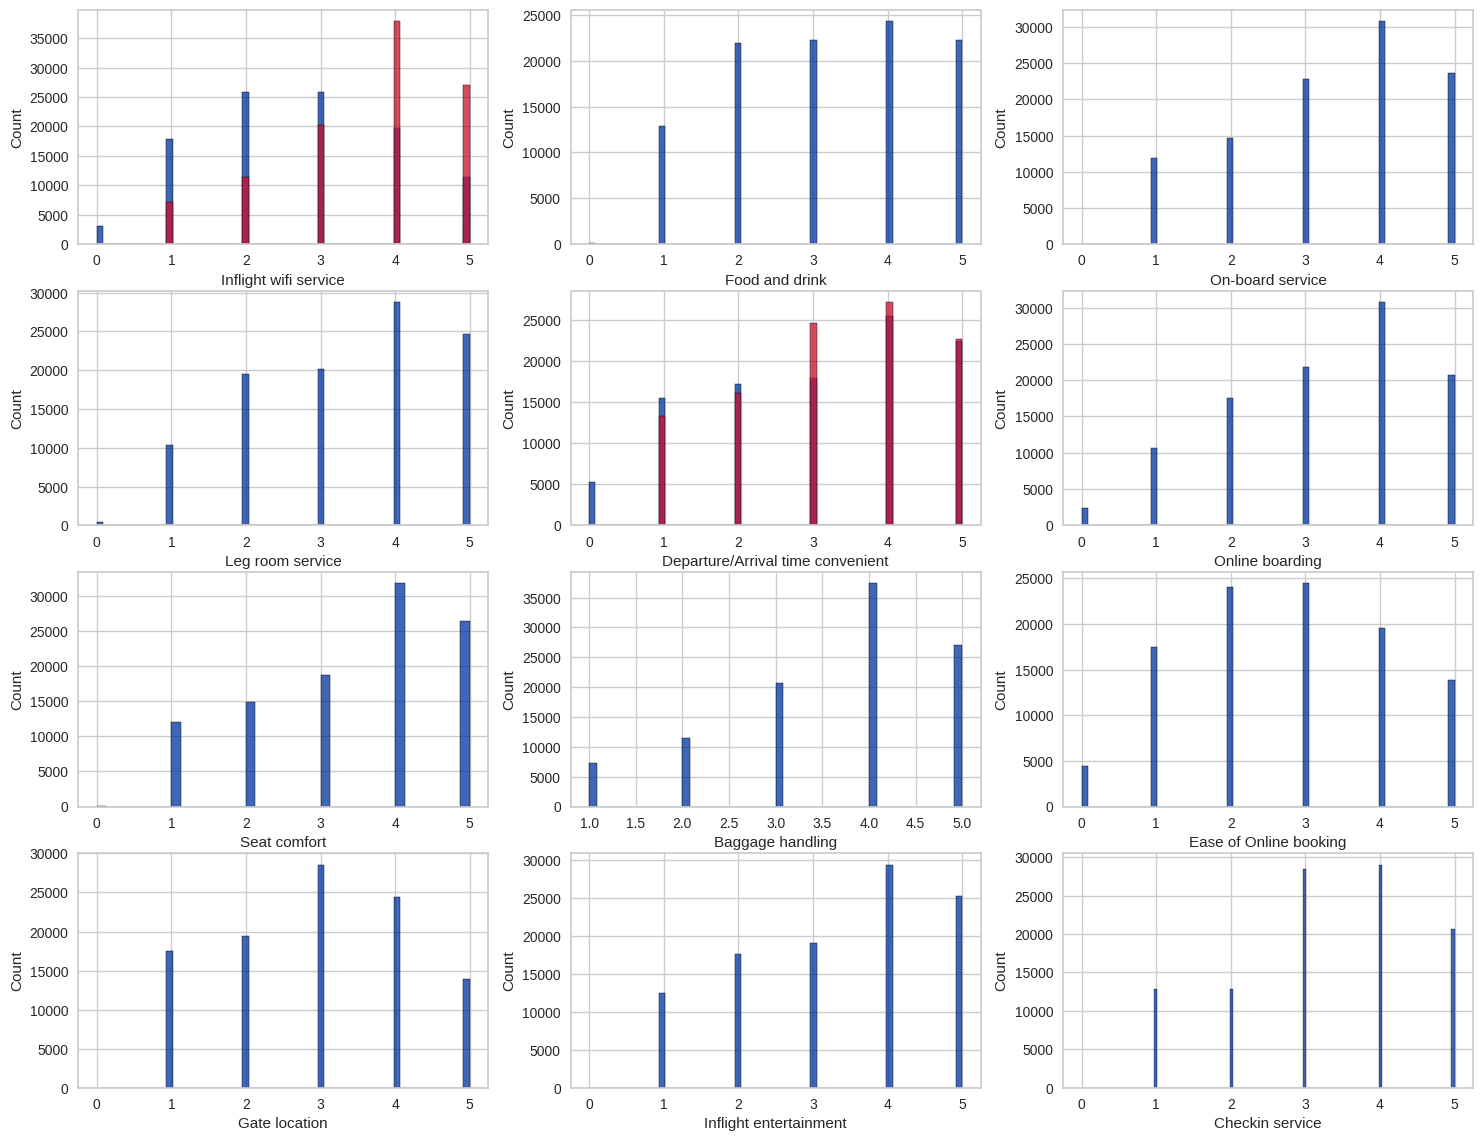

In [44]:
fig, axes = plt.subplots(4, 3, figsize = (18, 14))

i=0
a=0

for col in num_columns:
    i = 0 if i == 3 else i
    a = 0 if a==4 else a
    sns.histplot(train[col], ax = axes[a, i])#.set_title(col)
    
    a+=1
    i+=1

## Customer Satisfaction histogram plots

- For the most part, responses have the highest volume in the 4-5 satifaction range, which makes the plots with high volume at 2 or 3 stand out in contrast.

  - "Ease of Online booking" we can see that the highest counts are  at the 2-3 range, and 4-5 is lower. This indicates a potential opportunity, as the other graphs show a higher volume of satisfied customers at the 4-5 range.
  - Gate location is another area where we see a score of 3 as highest, instead of 4-5.


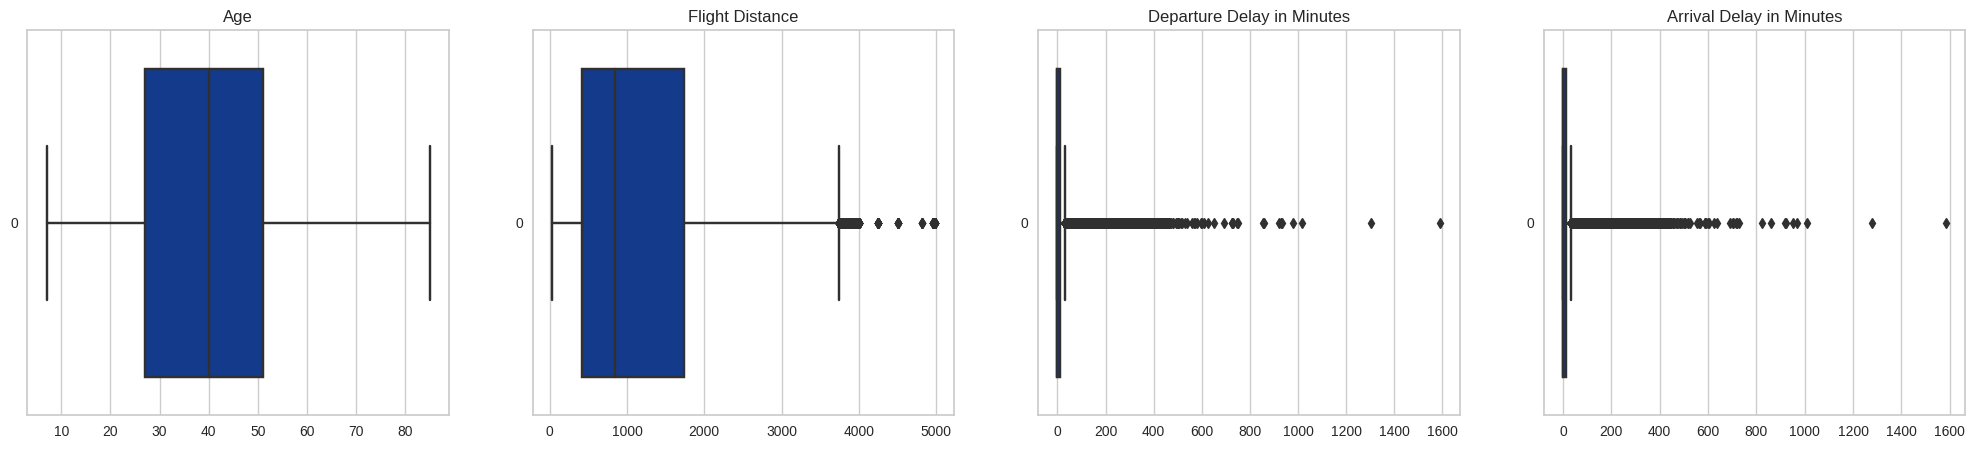

In [45]:
num_columns = ['Age', 'Flight Distance',  'Departure Delay in Minutes', 'Arrival Delay in Minutes']

fig, axes = plt.subplots(1, 4, figsize = (25, 5))

i=0
a=0

for col in num_columns:
    i = 0 if i == 4 else i
    sns.boxplot(train[col], orient = 'horizontal', ax = axes[ i]).set_title(col)
    i+=1;
    
    

We see right skewed data for departure/arrival delays in minutes, which makes sense given the subject. Some of the outliers for arrival/departure delay represent 26 hour delays.

We found it interesting that responses under 18 were included for this dataset (shown in the Age box plot).

# Modeling and Evaluation 1	

In [46]:
# if we want dummy variables
result_dummies = pd.get_dummies(result)

#removing the empty categorical columns
#result_dummies=result_dummies.drop(['Class_0', 'satisfaction_0'], axis=1)
result_dummies

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1,1,0,0,1,0,0,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,1,0,1,1,0,1,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,0,1,0
4,61,214,3,3,3,3,4,5,5,3,...,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,1,0,1,1,0,1,0,0,1,0
25972,23,646,4,4,4,4,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,...,0,1,0,0,1,0,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,1,1,0,1,0,1,0,0,0,1


In [47]:
X_all = result_dummies.drop('satisfaction_satisfied', 
                            axis = 1)

X_all = X_all.drop('satisfaction_neutral or dissatisfied', 
                   axis = 1)

y_all = result['satisfaction']

In [48]:
y_all

0        neutral or dissatisfied
1        neutral or dissatisfied
2                      satisfied
3        neutral or dissatisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 129880, dtype: object

In [49]:
X, X_test, y, y_test = train_test_split(X_all, 
                                        y_all, 
                                        test_size = 0.2, 
                                        random_state = 42)
X.shape, X_test.shape

((103904, 27), (25976, 27))

In [50]:
import warnings
warnings.filterwarnings("ignore")

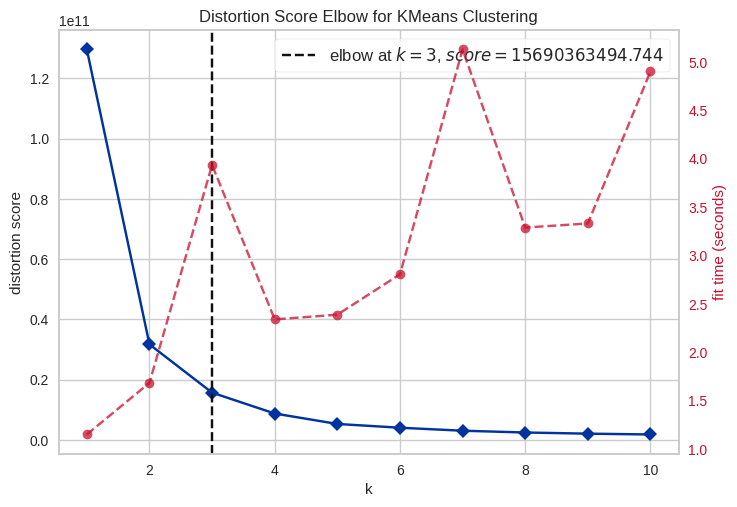

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


# Visualizing the elbow choosing the best number of clusters
visualizer=KElbowVisualizer(KMeans(), k=(1, 11))
visualizer.fit(X_all)
visualizer.show()

In [52]:
kmeans = KMeans(n_clusters = 3, 
                random_state = 42, 
                n_init = "auto").fit(X_all)

In [53]:
# number of clusters
len(set(kmeans.labels_))

3

In [54]:

result_cluster = result_dummies.copy()

result_cluster['Cluster KMean'] = kmeans.labels_
result_cluster

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Cluster KMean
0,13,460,3,4,3,1,5,3,5,5,...,1,0,0,1,0,0,1,1,0,0
1,25,235,3,2,3,3,1,3,1,1,...,0,1,1,0,1,0,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,0,1,0,1,0,0,0,1,0
3,25,562,2,5,5,5,2,2,2,2,...,1,0,1,0,1,0,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,0,1,1,0,1,0,0,1,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,1,0,1,0,1,0,0,0,1,0
25973,17,828,2,5,1,5,2,1,2,2,...,1,0,0,1,0,1,0,1,0,0
25974,14,1127,3,3,3,3,4,4,4,4,...,1,0,1,0,1,0,0,0,1,0


In [55]:
result_cluster.groupby('Cluster KMean').mean()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
Cluster KMean,,,,,,,,,,,,,,,,,,,,,
0,38.338959,552.570812,2.721286,3.077619,2.694373,2.973982,3.150692,3.054780,3.294383,3.237293,...,0.490957,0.753627,0.246373,0.605934,0.394066,0.313364,0.591692,0.094944,0.669891,0.330109
1,43.043637,3182.390736,2.734584,2.944156,2.907193,2.999715,3.365752,3.828019,3.847927,3.719012,...,0.497005,0.986310,0.013690,0.956192,0.043808,0.943015,0.047174,0.009811,0.265758,0.734242
2,40.328407,1791.799575,2.745892,3.068833,2.842393,2.971657,3.260485,3.464453,3.611060,3.481661,...,0.494652,0.893309,0.106691,0.769714,0.230286,0.665013,0.288221,0.046766,0.451631,0.548369


We an see:
- Cluster 0 is more dissatisfied group.
- Cluster 1 is more satisfied group.
- Cluster 2 is very close to being even between satisfied/unsatisifed, with the satisfied group being slightly more.

Kmeans Clustering

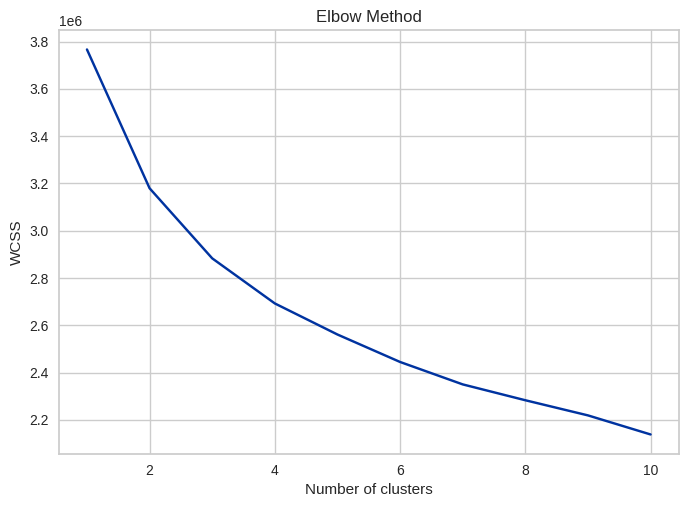

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
Cluster,,,,,,,,,,,,,,,,,,,,,
0,30.166067,708.771790,2.637760,2.332441,2.629422,2.995085,2.982094,2.638462,2.947556,2.997937,...,0.457474,0.000000,1.000000,0.993154,0.006846,0.364390,0.595629,0.039981,0.791495,0.208505
1,43.636884,1701.997492,3.190568,2.994629,3.032756,3.010031,3.686307,4.201309,4.215957,4.293786,...,0.500089,0.979006,0.020994,0.988704,0.011296,0.859410,0.107435,0.033156,0.012206,0.987794
2,42.489652,1343.642285,2.311223,2.882847,2.856408,2.986459,2.718858,2.819514,2.858808,2.359344,...,0.496336,0.999786,0.000214,0.958521,0.041479,0.565540,0.313965,0.120495,0.839954,0.160046
3,38.134222,785.581104,2.496188,3.663307,2.450655,2.921932,3.068222,2.770809,3.181487,3.082875,...,0.502365,0.998889,0.001111,0.003695,0.996305,0.049978,0.841641,0.108380,0.911311,0.088689


In [56]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(result_dummies)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the elbow plot and perform K-Means clustering
kmeans = KMeans(n_clusters = 4, 
                init = 'k-means++', 
                random_state = 42)

kmeans.fit(df_norm)

# Add the cluster labels to the original DataFrame
result_dummies['Cluster'] = kmeans.labels_

# Analyze the results by examining the mean values of each feature for each cluster
cluster_group_results=result_dummies.groupby('Cluster').mean()
cluster_group_results

In [57]:
print(f'Silhouette Score: {silhouette_score(X_all, kmeans.labels_)}')

Silhouette Score: -0.1601189777595564


In [58]:
#this takes 2 hours to run
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=4, eigen_solver='arpack', affinity="nearest_neighbors")
y_pred = spectral.fit_predict(X_all)
spectral=spectral.labels_


KeyboardInterrupt: ignored

In [31]:
# Add the cluster labels to the original DataFrame
result_dummies['spectral'] = spectral

# Analyze the results by examining the mean values of each feature for each cluster
spectral_data=result_dummies.groupby('spectral').mean()
spectral_data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Cluster
spectral,,,,,,,,,,,,,,,,,,,,,
0,39.427798,1188.230913,2.728702,3.057672,2.756853,2.976865,3.204797,3.252616,3.441418,3.358153,...,0.816860,0.183140,0.690583,0.309417,0.478529,0.449022,0.072449,0.565608,0.434392,1.600129
1,42.878049,4949.439024,2.536585,3.024390,2.463415,2.878049,3.000000,3.170732,3.097561,3.146341,...,0.902439,0.097561,0.634146,0.365854,0.560976,0.341463,0.097561,0.414634,0.585366,1.634146
2,35.695652,4243.000000,2.956522,3.043478,3.173913,3.391304,3.478261,3.478261,3.826087,3.652174,...,0.869565,0.130435,0.826087,0.173913,0.652174,0.217391,0.130435,0.434783,0.565217,1.391304
3,36.928571,4502.000000,2.857143,2.500000,3.142857,3.142857,3.142857,3.285714,3.285714,2.785714,...,0.928571,0.071429,0.642857,0.357143,0.571429,0.428571,0.000000,0.571429,0.428571,1.857143


In [29]:
print(f'Silhouette Score: {silhouette_score(X_all, spectral)}')

Silhouette Score: 0.5552185072916679


### Modeling and Evaluation 2

Evaluate and Compare

### Modeling and Evaluation 3

	Visualize Results

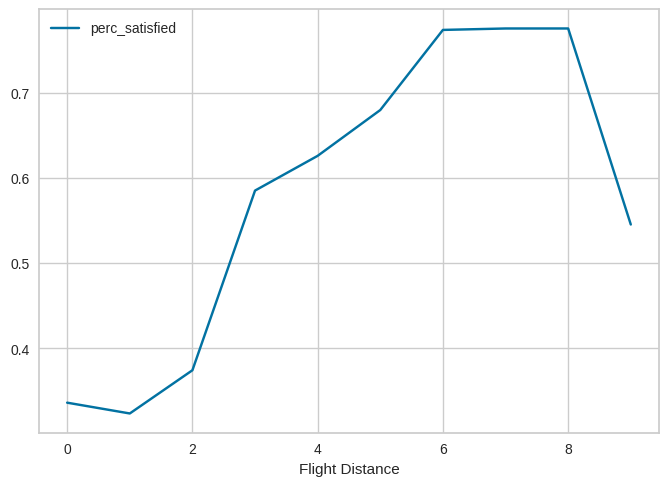

In [30]:
import plotly.express as px

agg_columns = ['satisfaction_satisfied', 'Flight Distance']
agg_df = result_dummies[agg_columns]
agg_df['Flight Distance'] = pd.cut(agg_df['Flight Distance'], 10, labels=False)

agg_view=agg_df.groupby(['Flight Distance']).sum()
agg_view_divisor=agg_df.groupby(['Flight Distance']).count()
agg_view_divisor
agg_view

agg_view=pd.merge(agg_view.drop_duplicates(),agg_view_divisor,how='inner',on=['Flight Distance'])

agg_view['satisfaction_satisfied_x']=agg_view['satisfaction_satisfied_x']/agg_view['satisfaction_satisfied_y']
agg_view = agg_view.rename(columns={'satisfaction_satisfied_x': 'perc_satisfied', 'satisfaction_satisfied_y': 'total'})

agg_view=pd.merge(agg_view.drop_duplicates(),agg_view_divisor,how='inner',on=['Flight Distance'])

agg_view.round(decimals=1)
agg_view = agg_view.drop('total', 
                   axis = 1)
agg_view = agg_view.drop('satisfaction_satisfied', 
                   axis = 1)
lines = agg_view.plot.line()


### Modeling and Evaluation 4

Summarize the Ramifications

### Deployment

10	Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

## Exceptional Work

In order to provide further insight, we ran some decision trees to get information on what is important in determing whether a customer is sattisfied or not. 

Important to note, these predictions won't be leveraged/deployed, as the classification for satisfied/unsatisfied is built off of the other columns in the dataset. This is done simply to find what features were important, in order to garner some ideas about where there are areas for improvement with airlines.


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model_gini = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best',
    random_state = 42,
    max_depth = 10
)

model_gini.fit(X, y)

In [ ]:
y_predictions_gini = model_gini.predict(X_test)
print(y_predictions_gini)

In [ ]:
results_gini = pd.DataFrame()
results_gini['Actual'] = y_test
results_gini['Prediction'] = y_predictions_gini
results_gini['Correct'] = results_gini['Actual'] == results_gini['Prediction']
results_gini = results_gini.reset_index().drop('index', axis = 1)
results_gini

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_predictions_gini), 
      '\n \n', 
      'Classification Report: \n')

print(classification_report(y_test, 
                            y_predictions_gini, 
                            digits = 5))


Entropy Decision Tree

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model_gini = DecisionTreeClassifier(
    criterion = 'entropy',
    splitter = 'best',
    random_state = 42,
    max_depth = 10
)

model_gini.fit(X, y)

In [ ]:
y_predictions_gini = model_gini.predict(X_test)
print(y_predictions_gini)

In [ ]:
results_gini = pd.DataFrame()
results_gini['Actual'] = y_test
results_gini['Prediction'] = y_predictions_gini
results_gini['Correct'] = results_gini['Actual'] == results_gini['Prediction']
results_gini = results_gini.reset_index().drop('index', axis = 1)
results_gini

Gini Decision Tree

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_predictions_gini), 
      '\n \n', 
      'Classification Report: \n')

print(classification_report(y_test, 
                            y_predictions_gini, 
                            digits = 5))


### Need to add importance plot with what insights come from it.